## 4장. 기초통계량

### 4.1 평균, 분산, 표준편차

#### (1)평균 
데이터의 중심

[1.산술평균:n빵]
중앙값과는 다르다,이상치에 매우 민감하다
따라서 평균과 중앙값을 비교하며 데이터를 바라보는 것도 좋겠음

[2.기하평균] 곱의 평균 / 자료들의 곱을 자료 수 만큼 제곱근 한 값 /ex)인구성장률, 경제성장률, 수익률 등

[3.가중평균] 데이터 별 가중치를 곱하여 평균을 낸 것 ex)학점 평점평균

[4.조화평균: 역수의 산술평균의 역수 / 상대적인 비를 갖는 단위의 평균]

성능,효율성을 판단할 때 사용한다 / 단, 동일한 조건(거리,금액)에 대해 요소들이 다를 때 판단

총 200페이지의 책(동일한 조건)을 10일동안은 1시간에 10페이지씩, 20일동안은 1시간에 5페이지씩 공부했다면? 매일 공부한 페이지 수는 어떻게 될까?

#### (2) 분산/표준편차
자료들의 퍼짐정도

#### [고객관계관리전략 문제]

A 쇼핑은 고객에게 쿠폰으로 증정된 할인권의 사용횟수에 대해 평균과 분산 및 표준편차를 성별에 따라 구해 보고자 한다. 할인권의 사용횟수 평균과 분산에 따라 고객에게 제공하는 쿠폰제공 횟수를 조절할 수 있고, 만약 성별에 따라 할인권 사용횟수에 대한 분포가 다르다면 성별에 따른 차별화된 할인쿠폰 제공 전략을 시행할 수 있기 때문이다.

In [1]:
# 실습 데이터 불러오기
import pandas as pd
df = pd.read_csv("C:\python\Ashopping.txt",sep=",", encoding='CP949')
df.head()

,고객ID,이탈여부,총_매출액,방문빈도,1회_평균매출액,할인권_사용_횟수,총_할인_금액,고객등급,구매유형,클레임접수여부,...,음향_적절성,안내_표지판_설명,친절성,신속성,책임성,정확성,전문성,D1,D2,D3
0,1,0,4007080,17,235711,1,5445,1,4,0,...,6,6,6,6,6,6,6,0,0,1
1,2,1,3168400,14,226314,22,350995,2,4,0,...,6,6,5,3,6,6,6,0,0,1
2,3,0,2680780,18,148932,6,186045,1,4,1,...,6,6,7,7,6,6,7,0,0,1
3,4,0,5946600,17,349800,1,5195,1,4,1,...,6,6,6,6,6,5,6,0,0,1
4,5,0,13745950,73,188301,9,246350,1,2,0,...,6,5,5,6,6,5,6,1,0,0


In [2]:
df.columns

Index(['고객ID', '이탈여부', '총_매출액', '방문빈도', '1회_평균매출액', '할인권_사용_횟수', '총_할인_금액',
       '고객등급', '구매유형', '클레임접수여부', '구매_카테고리_수', '거주지역', '성별', '고객_나이대', '거래기간',
       '할인민감여부', '멤버쉽_프로그램_가입전_만족도', '멤버쉽_프로그램_가입후_만족도', 'Recency',
       'Frequency', 'Monetary', '상품_만족도', '매장_만족도', '서비스_만족도', '상품_품질',
       '상품_다양성', '가격_적절성', '상품_진열_위치', '상품_설명_표시', '매장_청결성', '공간_편의성',
       '시야_확보성', '음향_적절성', '안내_표지판_설명', '친절성', '신속성', '책임성', '정확성', '전문성',
       'D1', 'D2', 'D3'],
      dtype='object')

In [4]:
#분석에 활용할 칼럼만 추출
df_1 = df[['할인권_사용_횟수','성별']]
df_1.head()

,할인권_사용_횟수,성별
0,1,1
1,22,1
2,6,1
3,1,1
4,9,0


In [6]:
df_gender=df_1.groupby('성별')
df_gender.mean()

,할인권_사용_횟수
성별,
0,15.986577
1,16.034078


In [27]:
df_gender.var()

,할인권_사용_횟수
성별,
0,69.053873
1,69.750602


#### 결과 해석

- 고객들의 할인권 사용횟수는 약 16회, 표준편차는 약 8.3회
- 남성과 여성사이에 큰 차이는 없음 -> 마케팅 전략에 성별에 따른 개별 전략을 모색하지 않아도 될 것으로 보임.
- 1년에 16회 이상의 평균적인 할인권 사용횟수를 보인다는 것은 우선 1년에 약 30회의 할인쿠폰을 제공하는 A 쇼핑몰의 입장에서 할인쿠폰 전략이 우수한 성과를 보인다고 판단 가능




### 4.2 왜도와 첨도

####  (1) 왜도
자료들의 분포가 좌, 우로 치우쳐져 있는 정도

정규분포를 띄지 않는 것

따라서 왜도를 확인하고 데이터들의 분포를 확인했을 때 그 치우침 정도가 너무나도 크다면 Scaling, log처리 등 표준화/정규화 과정을 수행해야함

skewness > 0 : 왼쪽으로 치우쳐짐
skewness = 0 : 대칭분포
skewness < 0 : 오른쪽으로 치우쳐짐

##### cf) 정규분포
정규분포는 특정값의 출현비율을 그렸을 때, 중심(평균값)을 기준으로 좌우 대칭 형태가 나타나며, 좌우 극단으로 갈수록 급격하게 수치가 낮아지는 특징이 있다. 그래서 변곡점도 2개 있는데, 모두 \muμ에서 \sigmaσ만큼 떨어져 있다.하지만 표준편차의 수치가 위의 이미지처럼 꼭 기계적으로 딱딱 맞아야 하는 것은 아니고 대략 저런 '종' 형태로 나타난다.

#### (2) 첨도
자료들이 얼마나 평균에 집중돼 있는지 확인할 수 있는 통계량

#### [고객관계관리전략 문제]
**A 쇼핑 역시 매년 정기적인 고객만족도 평가를 수행해 오고 있다. A 쇼핑에서는 단순한 고객만족도 평균값의 상승보다는 분포적인 특성의 변화를 살펴봄으로써 고객만족도의 질적 수준이 얼마나 상승하였는지를 판단하고자 하였다. 지난해 기준에서 A 쇼핑의 고객만족도는 평균 5.2, 왜도 -0.6, 첨도 1.0의 수준이었다.

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 42 columns):
고객ID                1000 non-null int64
이탈여부                1000 non-null int64
총_매출액               1000 non-null int64
방문빈도                1000 non-null int64
1회_평균매출액            1000 non-null int64
할인권_사용 횟수           1000 non-null int64
총_할인_금액             1000 non-null int64
고객등급                1000 non-null int64
구매유형                1000 non-null int64
클레임접수여부             1000 non-null int64
구매_카테고리_수           1000 non-null int64
거주지역                1000 non-null int64
성별                  1000 non-null int64
고객_나이대              1000 non-null int64
거래기간                1000 non-null int64
할인민감여부              1000 non-null int64
멤버쉽_프로그램_가입전_만족도    1000 non-null int64
멤버쉽_프로그램_가입후_만족도    1000 non-null int64
Recency             1000 non-null int64
Frequency           1000 non-null int64
Monetary            1000 non-null int64
상품_만족도              1000 non-null int64
매장_만족도        

In [9]:
df.서비스_만족도.skew() #왜도

-0.9706614720587393

In [10]:
df.서비스_만족도.kurt()#첨도

1.1478245800949547

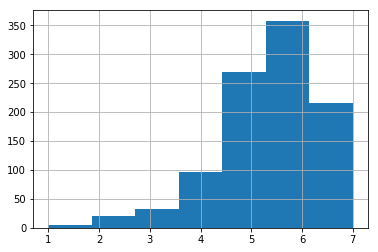

In [8]:
df.서비스_만족도.hist(bins=7)#bins 간격이 n인 히스토그램

In [9]:
df.서비스_만족도.mean()

5.544

#### 결과 해석
- A 쇼핑몰의 고객만족도의 왜도 값은 -0.971로 도출되어 평균에 비해 약간 오른쪽으로 치우친 왼쪽 꼬리를 갖는 분포임
- 첨도 값은 1.148이 도출되어 정규분포보다 다소 뾰족한 형태의 분포임
- 지난해의 경우 고객만족도 평균은 5.2, 왜도는 -0.6, 첨도는 1.0 수준이었으므로, 단순한 평균값의 증가보다는 만족도를 높게 평가하는 우호적인 고객들의 숫자가 더 많아졌다는 점에 주목해야함.

### 4.3 기타 기술통계량

A 쇼핑몰은 고객들에게 정기적으로 할인쿠폰을 발송하고 있다. 고객별로 매월 1장 내지는 2장 정도의 할인쿠폰을 발송하고 있는데, 고객들의 평균적인 할인쿠폰 사용빈도는 연 16회 정도이므로 현재 발송횟수가 적절하다고 생각해 왔다. 그러나 할인쿠폰 사용빈도의 평균만으로는 의사결정의 신뢰성이 떨어질 수 있기 때문에 중앙값, 최빈값 같은 기술통계량으로 의사결정의 타당성을 검증해 보고자 한다.


In [28]:
import numpy as np
np.percentile(df.할인권_사용_횟수, 25)#1분위수

9.0

In [30]:
df_num= df[['할인권_사용_횟수']]
df_num

,할인권_사용_횟수
0,1
1,22
2,6
3,1
4,9
5,20
6,30
7,4
8,17
9,27


In [31]:
np.percentile(df.할인권_사용_횟수, 50)#2분위수

17.0

In [32]:
np.percentile(df.할인권_사용_횟수, 75)#3분위수

23.0

In [15]:
df['할인권_사용_횟수'].value_counts().idxmax()

22

In [12]:
df.할인권_사용_횟수.describe()

count    1000.000000
mean       16.027000
std         8.341334
min         1.000000
25%         9.000000
50%        17.000000
75%        23.000000
max        30.000000
Name: 할인권_사용_횟수, dtype: float64

#### 결과 해석

- 분석결과 고객들의 할인권 사용횟수의 최빈값은 22회이며, 사분위수의 제1사분위는 9회, 제2사분위는 17회(중앙값과 동일), 제3사분위수는 23회
- 중간 수준으로 할인쿠폰을 사용하는 고객은 연 17회 사용하며, 연간 22회를 사용하는 고객이 가장 많다.
- 전체적으로 상위고객으로 갈수록 연간 할인권 사용횟수가 많이 높아진다는 것을 알 수 있다.
- A 쇼핑몰의 경우 현재 월 1~2회의 할인쿠폰 발송빈도는 다소 낮다고 볼 수 있다. 파레
토 법칙처럼 상위 20%의 주력고객들을 감안할 때 연간 30회 이상의 할인쿠폰을 사용하고 있으므로, 최소한 월 2회에서 월 3회까지는 할인쿠폰을 발송하는 것이 현재 우수 고객들의 구매패턴에 맞는 마케팅